In [15]:
import pandas as pd
names = ['age_at_scan', 'age_at_recruitment', 'sex', 'ef', 'dd', 'drinker']

In [49]:
ACM = pd.read_csv("https://raw.githubusercontent.com/ImperialCardioGenetics/ACM/master/input-files/ACM_pheno.tsv", sep="\t")
ACM = ACM[[
    'AGE_AT_LAST_CONSULTATION', 
    'Age_at_initial_clinical_assesement', 
    'Sex_males', 
    'Initial_ejection_fraction',
    'Diastolic_diameter',
    'NON_DRINKER'
]]
ACM.columns = names
ACM.head()
ACM['age_at_scan'] = ACM['age_at_scan'].astype(float)
ACM['age_at_recruitment'] = ACM['age_at_recruitment'].astype(float)
ACM['sex'] = ACM['sex'].replace({0 : 'F', 1 : 'M'})
ACM['drinker'] = ACM['drinker'].replace({1 : False, 0: True})
ACM['type'] = 'ACM'
ACM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 7 columns):
age_at_scan           141 non-null float64
age_at_recruitment    141 non-null float64
sex                   141 non-null object
ef                    141 non-null int64
dd                    136 non-null float64
drinker               141 non-null bool
type                  141 non-null object
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 6.8+ KB


In [50]:
DCM = pd.read_csv("https://raw.githubusercontent.com/ImperialCardioGenetics/ACM/master/input-files/DCM_pheno.txt", sep="\t")
DCM = DCM[[
    'AGE_AT_scan', 
    'AGE_AT_recruitment', 
    'SEX', 
    'EF',
    'DD',
    'EtOHXS'
]]
DCM.columns = names
DCM['dd'] = DCM['dd'].astype(float)
DCM['type'] = 'DCM'

DCM.head()

,age_at_scan,age_at_recruitment,sex,ef,dd,drinker,type
0,69.076712,69.076712,F,31,279.0,False,DCM
1,53.764384,53.764384,F,38,240.0,False,DCM
2,60.597260,60.597260,F,51,196.0,False,DCM
3,58.008219,58.008219,M,37,214.0,False,DCM
4,61.416438,61.416438,M,36,184.0,False,DCM


In [51]:
combined = pd.concat([ACM, DCM])
combined.head()

,age_at_scan,age_at_recruitment,sex,ef,dd,drinker,type
0,68.0,59.0,M,15,71.0,False,ACM
1,61.0,47.0,M,18,71.0,False,ACM
2,52.0,45.0,M,20,66.0,False,ACM
3,60.0,59.0,M,34,65.0,False,ACM
4,49.0,42.0,M,31,55.0,False,ACM


In [53]:
combined.groupby('type')[['dd','ef']].aggregate(['mean', 'median', 'std'])

dd                           ef                  
            mean median        std       mean median        std
type                                                           
ACM    65.617647   65.0   9.076677  26.510638     25   9.286409
DCM   257.713115  240.0  82.578761  38.699454     39  12.750605

In [57]:
m45_55 = combined[
    (combined['age_at_scan'].between(45,55))
    & (combined['sex'] == 'M')
]

In [58]:
m45_55.groupby('type')[['dd','ef']].aggregate(['mean', 'median', 'std'])

dd                           ef                  
            mean median        std       mean median        std
type                                                           
ACM    67.500000   67.0   9.518987  25.531915     23   8.975452
DCM   288.223881  259.0  88.169743  37.194030     39  13.954731

In [62]:
combined['male_45_55'] = (combined['age_at_scan'].between(45,55)) & (combined['sex'] == 'M')
combined

,age_at_scan,age_at_recruitment,sex,ef,dd,drinker,type,male_45_55
0,68.000000,59.000000,M,15,71.0,False,ACM,False
1,61.000000,47.000000,M,18,71.0,False,ACM,False
2,52.000000,45.000000,M,20,66.0,False,ACM,True
3,60.000000,59.000000,M,34,65.0,False,ACM,False
4,49.000000,42.000000,M,31,55.0,False,ACM,True
5,50.000000,50.000000,M,17,67.0,False,ACM,True
6,42.000000,31.000000,M,15,71.0,True,ACM,False
7,45.000000,24.000000,M,45,63.0,True,ACM,True
8,46.000000,36.000000,M,47,64.0,True,ACM,True
9,59.000000,56.000000,F,20,56.0,False,ACM,False


In [65]:
combined.groupby(['male_45_55', 'type'])['ef'].median().unstack()

type,ACM,DCM
male_45_55,,
False,25.5,40.0
True,23.0,39.0


In [71]:
pd.cut(combined['age_at_scan'], bins=range(20, 80,5)).value_counts().sort_index()

(20, 25]     3
(25, 30]    12
(30, 35]     9
(35, 40]    20
(40, 45]    33
(45, 50]    57
(50, 55]    80
(55, 60]    77
(60, 65]    76
(65, 70]    67
(70, 75]    42
Name: age_at_scan, dtype: int64

In [72]:
import seaborn as sns
%matplotlib inline

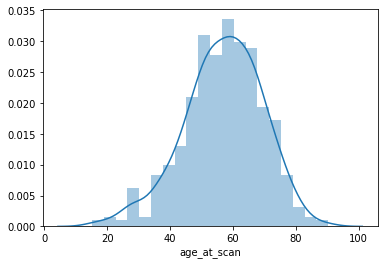

In [79]:
sns.distplot(
    combined['age_at_scan'],
    #kde=False,
    bins = 20
)

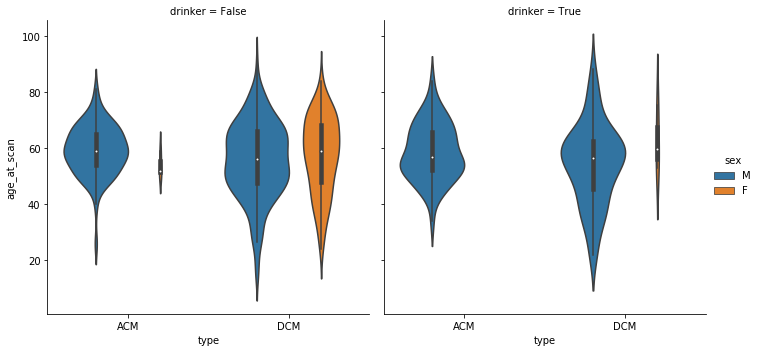

In [100]:
sns.catplot(
    data = combined,
    kind ='violin',
    x = 'type',
    y = 'age_at_scan',
    hue = 'sex',
    #split=True,
    col = 'drinker',
    scale = 'count'
)

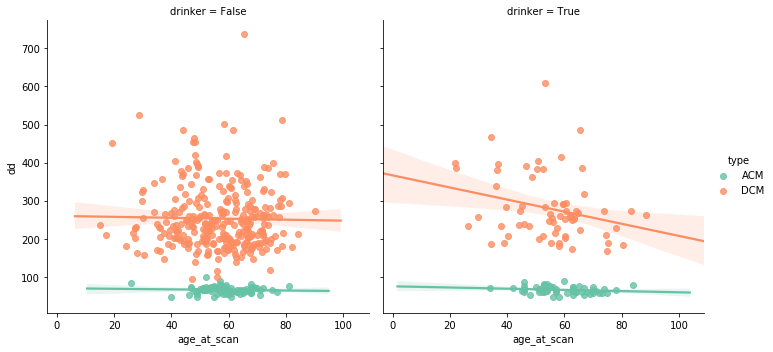

In [103]:
sns.lmplot(
    data = combined,
    x = 'age_at_scan',
    y = 'dd',
    hue = 'type',
    palette = 'Set2',
    col = 'drinker'
)

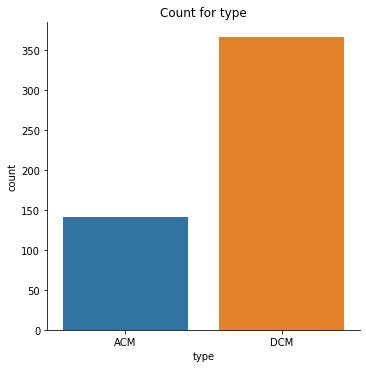

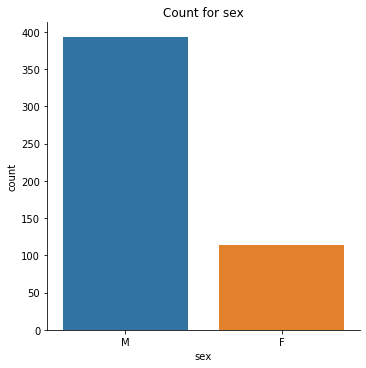

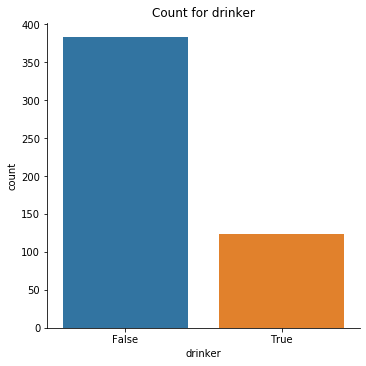

In [121]:
import matplotlib.pyplot as plt
for v in ['type', 'sex', 'drinker']:
    sns.catplot(
        data = combined,
        kind = 'count',
        x = v,
    )
    plt.title('Count for ' + v)

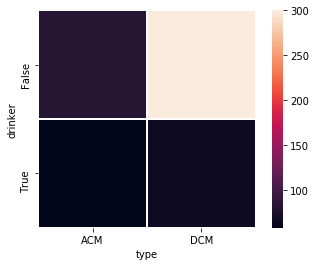

In [117]:
sns.heatmap(
    combined.groupby(['drinker', 'type']).size().unstack(),
    annot = False,
    square = True,
    linewidth=1
)